<a href="https://colab.research.google.com/github/Shatakshi127/102117165-SESS_LE1/blob/main/102117165_ShatakshiSaxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: **Shatakshi Saxena**  
Email: `ssaxena1_be21@thapar.edu`  
Roll No: **102117165**  
Group: **4CS6**  
Start Timestamp: YYYYMMDD-HHMM  

## Instructions

1. **Read and Summarize the Paper:**  
   Read the paper and provide a summary in about 50 words.

2. **Download and Analyze the Dataset:**  
   Download the dataset mentioned in the paper. Perform a statistical analysis and describe the dataset for future reference. (Include code snippets in your `.ipynb` file to support your analysis.)

3. **Train a Classifier:**  
   Train a classifier to distinguish the commands present in the dataset.

4. **Report Performance Results:**  
   Report the classifier's performance results using standard benchmarks.

5. **Create a New Voice Dataset:**  
   Record around 30 samples of each command in your voice, creating a new dataset with a unique user ID. You may use a timer on your computer to synchronize the recordings.

6. **Fine-tune the Classifier:**  
   Fine-tune your classifier to improve performance on your voice recordings.

7. **Report the Results:**  
   Report the results after fine-tuning.


## Data Loading

In [1]:
# data set loading
!wget -O dataset.tar.gz http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz

--2024-09-11 08:55:26--  http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.62.207, 142.251.163.207, 142.251.167.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.62.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2428923189 (2.3G) [application/gzip]
Saving to: ‘dataset.tar.gz’

dataset.tar.gz      100%[===================>]   2.26G  71.5MB/s    in 24s     

2024-09-11 08:55:50 (95.8 MB/s) - ‘dataset.tar.gz’ saved [2428923189/2428923189]



In [2]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

## Import the Speech Commands dataset


In [3]:
# import pathlib
# import tensorflow as tf

# # New dataset URL and extraction logic
# DATASET_PATH = 'data/speech_commands_v0.02'

# data_dir = pathlib.Path(DATASET_PATH)
# if not data_dir.exists():
#     tf.keras.utils.get_file(
#         'speech_commands_v0.02.tar.gz',
#         origin="http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz",
#         extract=True,
#         cache_dir='.', cache_subdir='data')


2428923189/2428923189 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [5]:
import os
import tarfile
import numpy as np
import tensorflow as tf  # Import TensorFlow

tar_file_path = 'dataset.tar.gz'  # Replace with the path to your tar.gz file
extracted_dir = 'speech_commands_dataset'  # Directory to extract to

# Check if the directory already exists to avoid re-extracting
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)  # Create the directory if it doesn't exist
    with tarfile.open(tar_file_path, 'r:gz') as tar:
        tar.extractall(extracted_dir)
        print(f"Extracted to {extracted_dir}")

# List the contents of the extracted folder
commands = np.array(tf.io.gfile.listdir(extracted_dir))
commands = commands[(commands != 'README.md') & (commands != '.DS_Store') & (commands != 'background_noise')]

print('Commands:', commands)


Extracted to speech_commands_dataset
Commands: ['right' 'eight' 'two' 'on' 'dog' 'bed' 'no' 'nine' 'cat' 'one' 'up'
 'five' 'backward' 'left' 'learn' 'marvin' 'go' 'follow' 'tree' 'off'
 'validation_list.txt' 'testing_list.txt' 'stop' 'zero' 'six' 'visual'
 'down' 'forward' 'LICENSE' 'happy' 'house' 'three' '_background_noise_'
 'sheila' 'wow' 'seven' 'four' 'yes' 'bird']


In [7]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=extracted_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 105835 files belonging to 36 classes.
Using 84668 files for training.
Using 21167 files for validation.

label names: ['_background_noise_' 'backward' 'bed' 'bird' 'cat' 'dog' 'down' 'eight'
 'five' 'follow' 'forward' 'four' 'go' 'happy' 'house' 'learn' 'left'
 'marvin' 'nine' 'no' 'off' 'on' 'one' 'right' 'seven' 'sheila' 'six'
 'stop' 'three' 'tree' 'two' 'up' 'visual' 'wow' 'yes' 'zero']


In [8]:
train_ds.element_spec

(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [9]:
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
val_ds = val_ds.map(squeeze, tf.data.AUTOTUNE)

In [10]:
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [11]:
for example_audio, example_labels in train_ds.take(1):
  print(example_audio.shape)
  print(example_labels.shape)

(64, 16000)
(64,)


Let's plot a few audio waveforms:

In [12]:
label_names[[1,1,3,0]]

array(['backward', 'backward', 'bird', '_background_noise_'], dtype='<U18')

## Data Analytics and Visualization

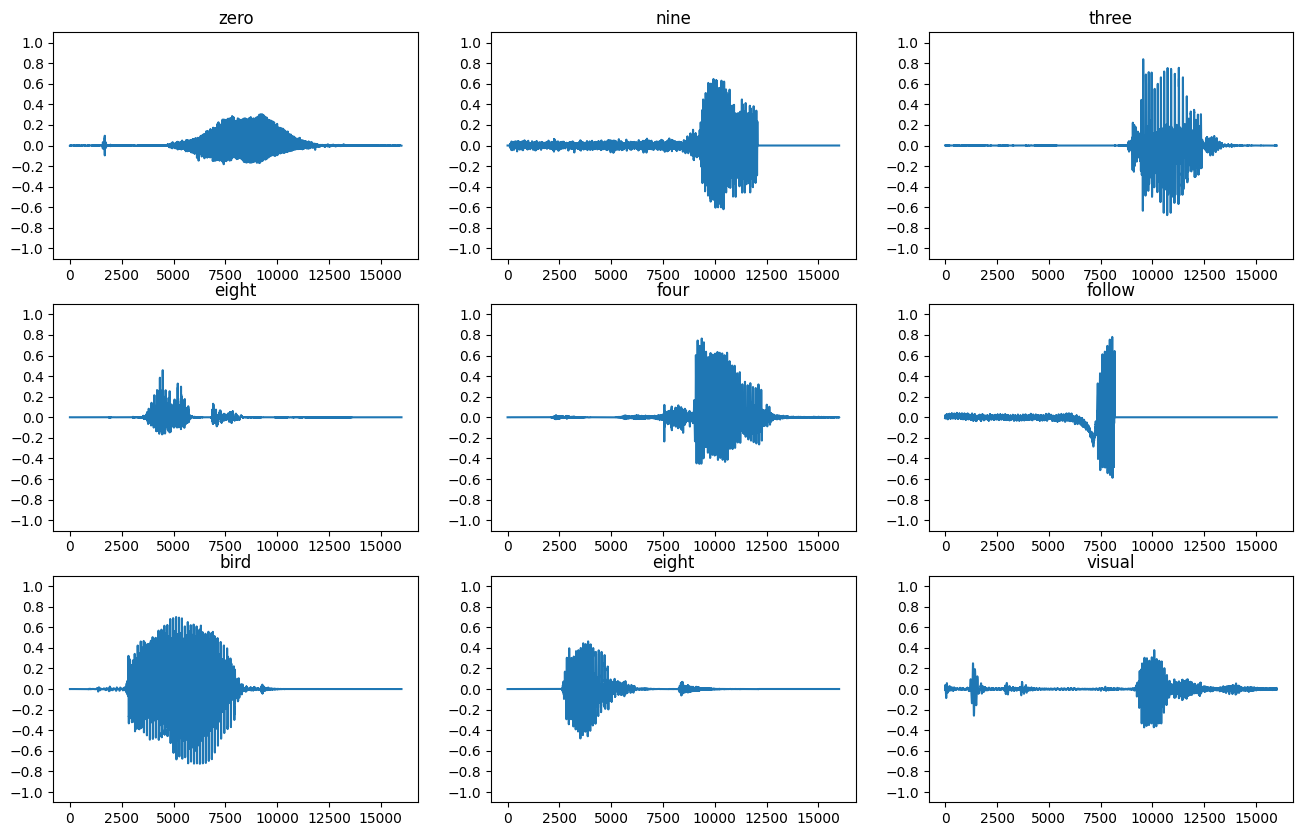

In [13]:
plt.figure(figsize=(16, 10))
rows = 3
cols = 3
n = rows * cols
for i in range(n):
  plt.subplot(rows, cols, i+1)
  audio_signal = example_audio[i]
  plt.plot(audio_signal)
  plt.title(label_names[example_labels[i]])
  plt.yticks(np.arange(-1.2, 1.2, 0.2))
  plt.ylim([-1.1, 1.1])

In [14]:
def get_spectrogram(waveform):
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [15]:
for i in range(3):
  label = label_names[example_labels[i]]
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display.display(display.Audio(waveform, rate=16000))

Label: zero
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: nine
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


Label: three
Waveform shape: (16000,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [16]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

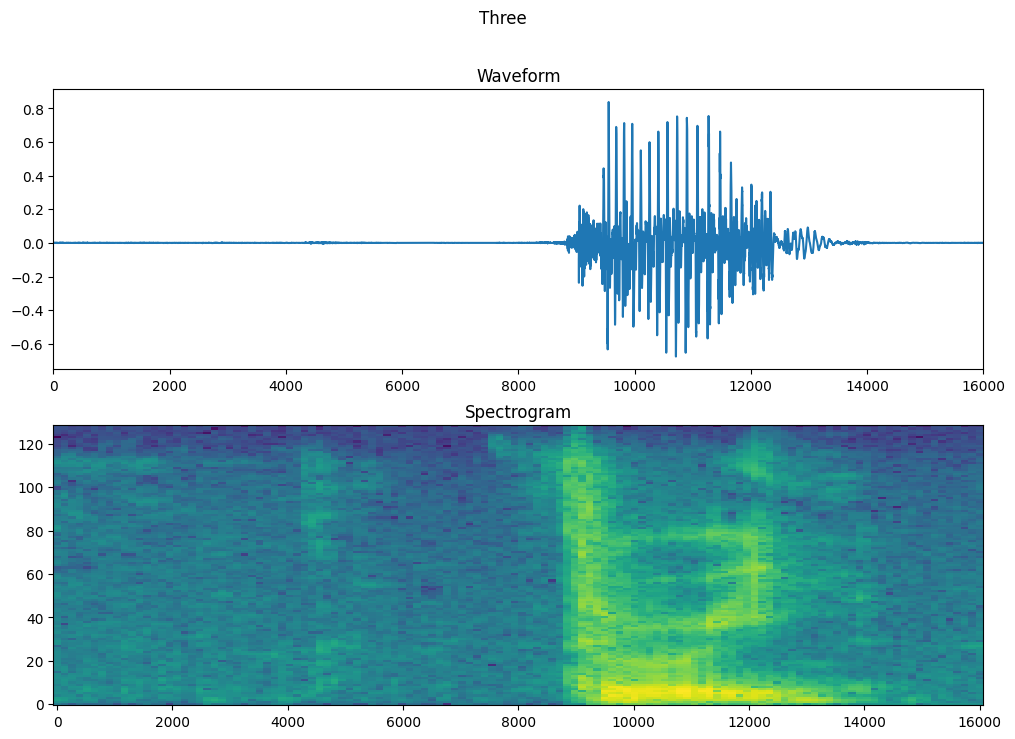

In [17]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()

In [18]:
def make_spec_ds(ds):
  return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [19]:
train_spectrogram_ds = make_spec_ds(train_ds)
val_spectrogram_ds = make_spec_ds(val_ds)
test_spectrogram_ds = make_spec_ds(test_ds)

In [20]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

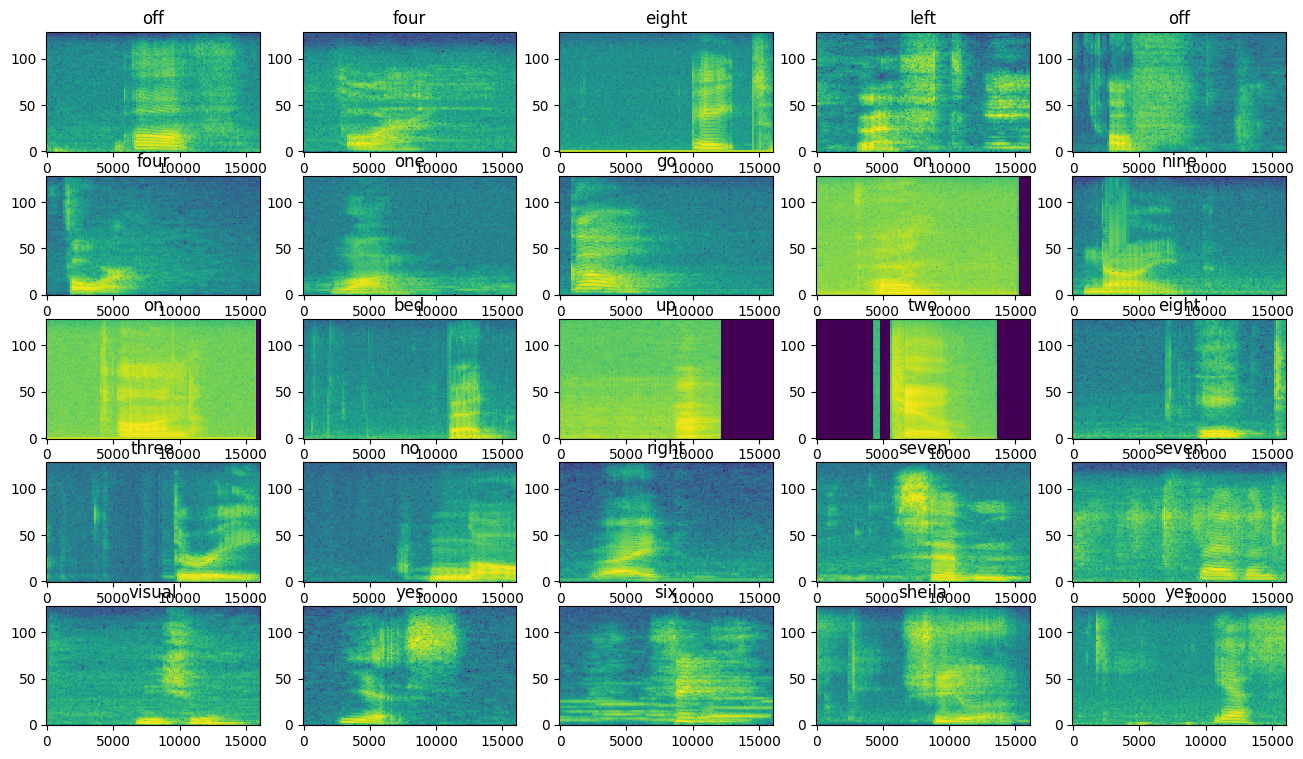

In [23]:
rows = 5
cols = 5
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)
    ax.set_title(label_names[example_spect_labels[i].numpy()])

plt.show()

## Build and train the model

In [24]:
train_spectrogram_ds = train_spectrogram_ds.cache().shuffle(10000).prefetch(tf.data.AUTOTUNE)
val_spectrogram_ds = val_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)
test_spectrogram_ds = test_spectrogram_ds.cache().prefetch(tf.data.AUTOTUNE)

In [25]:
input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)
num_labels = len(label_names)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ normalization (Normalization)        │ (None, 32, 32, 1)           │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,629,223 (6.21 MB)

 Trainable params: 1,629,220 (6.21 MB)

 Non-trainable params: 3 (16.00 B)

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [27]:
EPOCHS = 2
history = model.fit(
    train_spectrogram_ds,
    validation_data=val_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/2
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 342s 256ms/step - accuracy: 0.2675 - loss: 2.6524 - val_accuracy: 0.6825 - val_loss: 1.1290
Epoch 2/2
1323/1323 ━━━━━━━━━━━━━━━━━━━━ 280s 212ms/step - accuracy: 0.5844 - loss: 1.4080 - val_accuracy: 0.7494 - val_loss: 0.8961


Text(0, 0.5, 'Accuracy [%]')

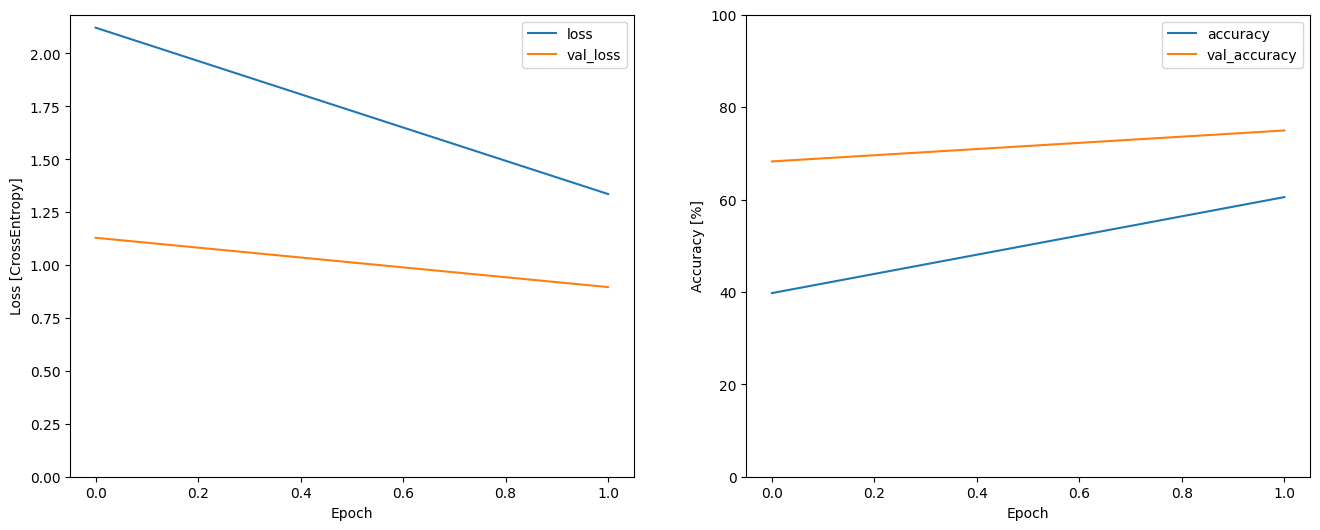

In [28]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

## Evaluate the model performance



In [29]:
model.evaluate(test_spectrogram_ds, return_dict=True)

166/166 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.7528 - loss: 0.8988


{'accuracy': 0.7542189359664917, 'loss': 0.8915225863456726}

### Display a confusion matrix




In [30]:
y_pred = model.predict(test_spectrogram_ds)

166/166 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step


In [31]:
y_pred = tf.argmax(y_pred, axis=1)

In [32]:
y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

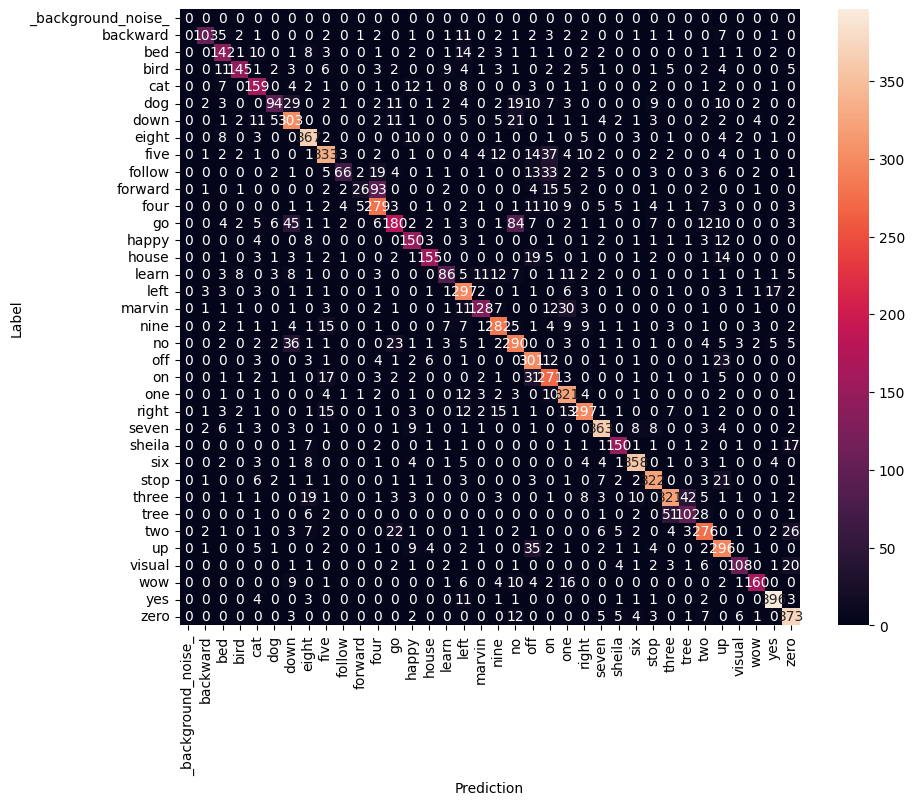

In [33]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

## Run inference on an audio file

Finally, verify the model's prediction output using an input audio file of someone saying "no". How well does your model perform?

Number of predicted categories: 36


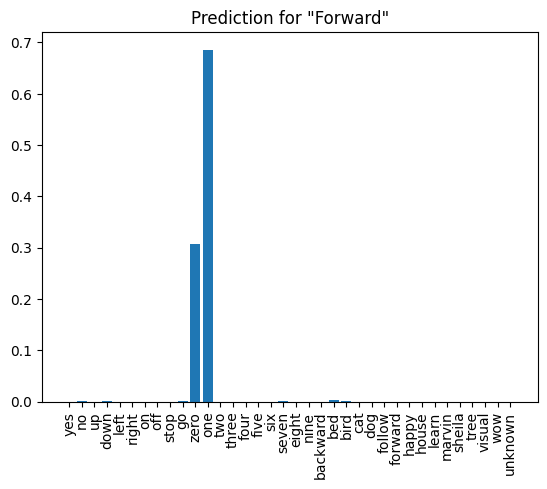

In [55]:
# Print number of predicted categories
num_classes = prediction.shape[-1]
print(f"Number of predicted categories: {num_classes}")

# List all 36 labels (if there are indeed 36 classes)
x_labels = [
    'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
    'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
    'backward', 'bed', 'bird', 'cat', 'dog', 'follow', 'forward', 'happy', 'house', 'learn',
    'marvin', 'sheila', 'tree', 'visual', 'wow', 'unknown'
]

# Visualize the prediction using a bar plot
plt.bar(x_labels, tf.nn.softmax(prediction[0]))
plt.title('Prediction for "Forward"')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


As the output suggests, your model should have recognized the audio command as "no".

## Export the model with preprocessing

The model's not very easy to use if you have to apply those preprocessing steps before passing data to the model for inference. So build an end-to-end version:

In [39]:
class ExportModel(tf.Module):
  def __init__(self, model):
    self.model = model

    # Accept either a string-filename or a batch of waveforms.
    # YOu could add additional signatures for a single wave, or a ragged-batch.
    self.__call__.get_concrete_function(
        x=tf.TensorSpec(shape=(), dtype=tf.string))
    self.__call__.get_concrete_function(
       x=tf.TensorSpec(shape=[None, 16000], dtype=tf.float32))


  @tf.function
  def __call__(self, x):
    # If they pass a string, load the file and decode it.
    if x.dtype == tf.string:
      x = tf.io.read_file(x)
      x, _ = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
      x = tf.squeeze(x, axis=-1)
      x = x[tf.newaxis, :]

    x = get_spectrogram(x)
    result = self.model(x, training=False)

    class_ids = tf.argmax(result, axis=-1)
    class_names = tf.gather(label_names, class_ids)
    return {'predictions':result,
            'class_ids': class_ids,
            'class_names': class_names}

Test run the "export" model:

In [41]:
# Define the path using pathlib.Path
extracted_dir = pathlib.Path('speech_commands_dataset')

# Correctly construct the file path
file_path = extracted_dir / 'no' / '01bb6a2a_nohash_0.wav'

# Convert to string and pass it to the ExportModel function
export = ExportModel(model)
export(tf.constant(str(file_path)))

{'predictions': <tf.Tensor: shape=(1, 36), dtype=float32, numpy=
 array([[-9.107324  , -3.0364387 , -0.8803024 , -1.9813522 , -3.5994256 ,
          0.8044635 ,  1.393517  , -4.508486  , -5.881631  , -1.5920084 ,
         -2.3491137 , -0.4823274 ,  2.9505463 , -5.3487744 , -3.736351  ,
          0.5680591 , -2.0504    , -2.3532836 , -0.38380134,  3.257369  ,
         -5.6219273 , -5.3308797 , -2.5488768 , -4.0055285 , -2.0085733 ,
         -1.0407541 , -5.3934665 , -1.311755  , -3.528938  , -4.506943  ,
          0.23056896, -4.4197073 ,  0.49572238,  0.34314373, -1.0083356 ,
          1.7805771 ]], dtype=float32)>,
 'class_ids': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([19])>,
 'class_names': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'no'], dtype=object)>}

Save and reload the model, the reloaded model gives identical output:

In [42]:
tf.saved_model.save(export, "saved")
imported = tf.saved_model.load("saved")
imported(waveform[tf.newaxis, :])

{'class_names': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'four'], dtype=object)>,
 'predictions': <tf.Tensor: shape=(1, 36), dtype=float32, numpy=
 array([[-17.39163   ,   2.4012754 ,  -6.811862  ,   1.8174843 ,
          -7.2994337 ,  -0.87531185,  -2.8427327 , -10.57259   ,
           0.72437906,   3.0616279 ,   8.465413  ,   9.268016  ,
          -1.1086988 , -11.080921  , -13.093351  ,   1.0351089 ,
          -7.484594  ,   1.559166  ,  -6.527608  ,  -7.8158603 ,
          -4.267358  ,   3.8378391 ,   1.6207682 ,  -7.4429016 ,
           0.7769272 ,  -3.5291102 ,  -9.667329  ,  -4.1176367 ,
          -3.750124  , -10.037111  ,  -1.4068176 ,  -5.1806183 ,
          -8.1076355 ,  -3.0350895 , -12.421255  ,  -1.9735881 ]],
       dtype=float32)>,
 'class_ids': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([11])>}

In [50]:
import tensorflow as tf
import numpy as np
import jiwer
from sklearn.metrics import accuracy_score

# Define your model saving and loading paths
model_path = "saved"

# Load the model
imported = tf.saved_model.load(model_path)

# Define the path to your test dataset
test_dir = pathlib.Path('path_to_test_data')  # Replace with the actual path to your test data

# Load test dataset
test_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=extracted_dir,
    batch_size=64,
    output_sequence_length=16000,  # Adjust as necessary
    label_mode='int'  # or 'categorical' if using one-hot encoding
)

# Function to predict labels for a dataset
def predict_labels(dataset, model):
    predictions = []
    true_labels = []
    for x, y in dataset:
        y_pred = model(x, training=False)
        predictions.extend(tf.argmax(y_pred, axis=1).numpy())
        true_labels.extend(y.numpy())
    return np.array(predictions), np.array(true_labels)

# Function to compute WER
def compute_wer(predictions, true_labels, labels):
    # Map numeric labels to their string equivalents
    label_map = {i: label for i, label in enumerate(labels)}
    pred_texts = [label_map.get(p, 'unknown') for p in predictions]
    true_texts = [label_map.get(t, 'unknown') for t in true_labels]

    # Compute WER
    wer = jiwer.wer(true_texts, pred_texts)
    return wer

# List of labels from the dataset
x_labels = [
    'yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
    'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine',
    'backward', 'bed', 'bird', 'cat', 'dog', 'follow', 'forward', 'happy', 'house', 'learn',
    'marvin', 'sheila', 'tree', 'visual', 'wow'
]

# Predict labels for test data
predictions, true_labels = predict_labels(test_ds, imported)

# Compute accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Compute WER
wer = compute_wer(predictions, true_labels, x_labels)
print(f"WER: {wer:.4f}")

# SOME ERROR WHILE CALCULATING WER SCORE.

Found 105835 files belonging to 36 classes.


TypeError: Binding inputs to tf.function failed due to `got an unexpected keyword argument 'training'`. Received args: (<tf.Tensor: shape=(64, 16000, 1), dtype=float32, numpy=
array([[[-1.2207031e-04],
        [-9.1552734e-05],
        [-9.1552734e-05],
        ...,
        [ 9.1552734e-05],
        [ 9.1552734e-05],
        [ 2.7465820e-04]],

       [[-1.5563965e-03],
        [-1.9531250e-03],
        [-2.0446777e-03],
        ...,
        [-1.7700195e-03],
        [-2.5634766e-03],
        [-2.7465820e-03]],

       [[-3.0517578e-04],
        [-3.6621094e-04],
        [-3.9672852e-04],
        ...,
        [ 9.1552734e-04],
        [ 5.1879883e-04],
        [ 9.7656250e-04]],

       ...,

       [[-9.1552734e-05],
        [-9.1552734e-05],
        [-1.2207031e-04],
        ...,
        [-7.3242188e-04],
        [-5.1879883e-04],
        [-3.3569336e-04]],

       [[-3.9672852e-04],
        [-7.6293945e-04],
        [-7.0190430e-04],
        ...,
        [ 2.7465820e-04],
        [ 2.7465820e-04],
        [ 5.1879883e-04]],

       [[-6.1035156e-05],
        [-1.5258789e-04],
        [-2.1362305e-04],
        ...,
        [-2.1362305e-04],
        [-9.1552734e-04],
        [-4.2724609e-04]]], dtype=float32)>,) and kwargs: {'training': False} for signature: (x).

Note: THERE IS SOME ERROR WHILE CALCULATING WER SCORE but due to time constraint As of now, I am moving forward with accuracy as my evaluation metrics. Though it is better to use wor score One of the standard benchmark for speech models. But as I have to proceed with the fine tuning on the custom data set, I have to move forward with accuracy as the standard benchmark.

In [ ]:
import tensorflow as tf

imported = tf.saved_model.load("saved")
model = tf.keras.Model(inputs=imported.input, outputs=imported.output)


## Fine Tuning on Custom Dataset:
Custom Data is Available at: https://drive.google.com/file/d/1OJBVVYhfUzckO9hCBaQvCRVXa24NN31b/view?usp=sharing

#### Load and Prepare the Pre-trained Model

In [ ]:
import tensorflow as tf

imported = tf.saved_model.load("saved")

model = tf.keras.Model(inputs=imported.input, outputs=imported.output)


In [ ]:
#Custom Dataset
tar_file_path = 'custom_data.tar'
extracted_dir = 'custom_data'

if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)
    with tarfile.open(tar_file_path, 'r:*') as tar:
        tar.extractall(extracted_dir)
        print(f"Extracted to {extracted_dir}")


In [ ]:
custom_data_dir = pathlib.Path(extracted_dir)

## Data Splitting

In [ ]:
train_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=custom_data_dir,
    batch_size=64,
    validation_split=0.2,  # 80% for training, 20% for validation
    seed=42,
    output_sequence_length=16000,
    subset='training',
    label_mode='int'
)

In [ ]:
imported_model = tf.keras.models.load_model("saved")

## Quantization Aware Training (QAT)


In [ ]:
def quantize_model(model):
    """Apply quantization-aware training to Conv2D and Dense layers."""
    return tf.keras.models.clone_model(
        model,
        clone_function=lambda layer: tf.keras.layers.QuantizeWrapper(layer)
        if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.Dense)) else layer
    )

In [ ]:
quantized_model = quantize_model(imported_model)


In [ ]:
quantized_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Fine tuning the quantized model

In [ ]:
history = quantized_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint('fine_tuned_quantized_model.h5', save_best_only=True),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    ]
)

In [ ]:
quantized_model = tf.keras.models.load_model('fine_tuned_quantized_model.h5')


In [ ]:
loss, accuracy = quantized_model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

In [ ]:
quantized_model.save("quantized_fine_tuned_model")
